<A HREF="https://www.geeksforgeeks.org/emotion-classification-using-nrc-lexicon-in-python/">G4G Emotion Classification using NRC Lexicon</A><P>
    <A HREF="https://github.com/metalcorebear/NRCLex">NRC Lexicon</A>

In [2]:
#!pip3 install NRCLex
#!python3 -m textblob.download_corpora


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # for fancy interactive plot
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import os # to check if directory exists and create it if it doesn't
from datetime import datetime # to parse speech date
from nrclex import NRCLex
import spacy
import en_core_web_md
import csv
import regex as re
import unicodedata

In [2]:
# Load up the files
#path = './DataUCSB/'
#path = './Data/'
#list_of_files = []

#for root, dirs, files in os.walk(path):
#    for file in files:
#        if file.endswith('.txt'):
#            list_of_files.append(os.path.join(root,file))

list_of_files = ['./speeches/2013-04-16-BostonMarathon.txt',
                 './NYTimes/2013-04-16-BostonMarathon.txt', 
                 './WSJ/2013-04-16-BostonMarathon.txt']
speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
    speeches.append(text)

In [3]:
emotions = []
for i in range(len(speeches)):
    emotions.append(NRCLex(speeches[i]))

Sr.	Method	Description<BR>
1	emotion.words 	        Return words list.<BR>
2	emotion.sentences	     Return sentences list.<BR>
3	emotion.affect_list	Return affect list.<BR>
4	emotion.affect_dict	Return affect dictionary.<BR>
5	emotion.raw_emotion_scores	Return raw emotional counts.<BR>
6	emotion.top_emotions	Return highest emotions.<BR>
7	emotion.affect_frequencies	Return affect frequencies.<BR>

<A HREF="https://matplotlib.org/cheatsheets/">Matplotlib cheat sheets</A>

In [5]:
# Load Files
def getfilenames(path):
    list_of_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                list_of_files.append(os.path.join(root,file))
    return(list_of_files)


def loadfiles(path):
    list_of_files = getfilenames(path)
    texts = []
    returnlist = []
    for file in list_of_files:
        # There's something in a NYTimes file that needs iso-8859-1 encoding
        with open(file, encoding='iso-8859-1') as f:
            text = f.read()
        returnlist.append([re.sub('\.\/([^;]*)\/', '', file), text])
    returnlist = pd.DataFrame (returnlist, columns = ['file', 'text'])
    return(returnlist)

<A HREF="https://regexr.com/">RegExr</A><BR>
    <A HREF="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas cheat sheet</A>

In [12]:
# Radar Plot of emotions of the one event
# https://fcpython.com/visualisation/radar-charts-matplotlib
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
Attributes = list(emotions[0].affect_frequencies.keys())
del Attributes[2] # Remove 'anticip' which seems to always be 0
AttNo = len(emotions[0].affect_frequencies.keys())-1

In [14]:
# Obama
values0 = list(emotions[0].affect_frequencies.values())
del values0[2]  # Remove 'anticip' which seems to always be 0
values0 += values0 [:1]

In [15]:
# NYTimes
values1 = list(emotions[1].affect_frequencies.values())
del values1[2] # Remove 'anticip' which seems to always be 0
values1 += values1 [:1]

In [16]:
# WSJ
values2 = list(emotions[2].affect_frequencies.values())
del values2[2] # Remove 'anticip' which seems to always be 0
values2 += values2 [:1]

In [17]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

/tmp/ipykernel_47554/2677420185.py:1: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


<IPython.core.display.Javascript object>


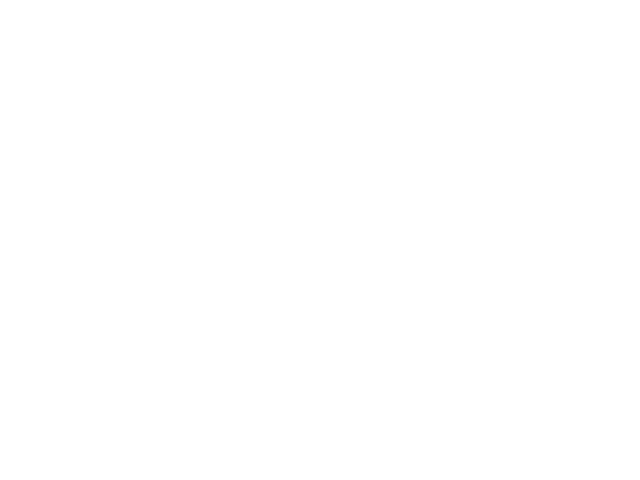

<IPython.core.display.Javascript object>


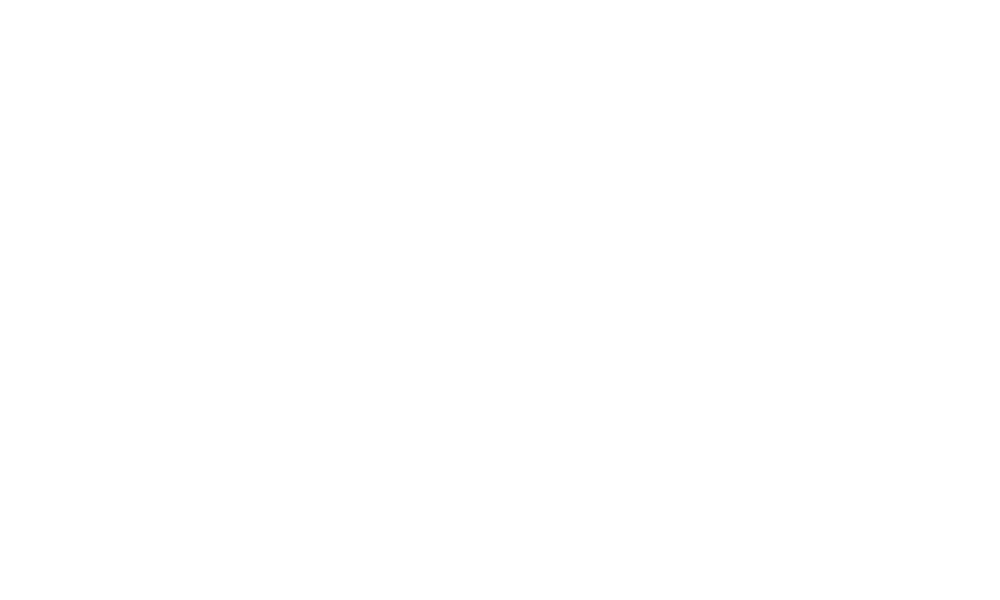

In [18]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
#Fill in the area plotted in the last line
ax.plot(angles,values0, 'red')
ax.fill(angles, values0, 'red', alpha=0.1)

ax.plot(angles,values1, 'green')
ax.fill(angles, values1, 'green', alpha=0.1)

ax.plot(angles,values2, 'blue')
ax.fill(angles, values2, 'blue', alpha=0.1)

#Give the plot a title and show it
plt.figtext(0.2,0.9,"Obama",color="red")
plt.figtext(0.2,0.85,"NYTimes",color="green")
plt.figtext(0.2,0.8,"WSJ",color="blue")
plt.show()

# Try some time series now

In [42]:
# Load up the all the American Rhetoric files
paths = ['./Data/'] 
list_of_files = []


for path in paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                list_of_files.append(os.path.join(root,file))

speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        #print(file)
        text = f.read()
    f.close()
    speeches.append([text, file])

#clean out goofy unicode  space characters 
speeches = [(unicodedata.normalize("NFKD", speech[0]), speech[1]) for speech in speeches if len(speech)>0 ]

# remove [stuff] in between square brackets
def remove_bracket(text):
    return re.sub('(\[[^w]*\]\s)', '',text)
speeches = [(remove_bracket(speech[0]), speech[1]) for speech in speeches]

def get_source(text):
    regex = "[^./][a-zA-Z]+[^/]"
    string = re.findall(regex, str(text))[0]
    if string == 'speeches': string = 'oba'
    if string == 'NYTimes': string = 'nyt'
    if string == 'Data': string = 'amrhet'
    return string.lower()

def get_date(text):
    regex = "([0-9]+[\-][0-9]+[\-][0-9]+)"
    return re.findall(regex, str(text))[0]

def get_filename(text):
    regex = "[-]([a-zA-Z]+)"
    return re.findall(regex, str(text))[0]

dates = pd.read_csv('datetitle.csv') # day-month-year
dates['date'] = pd.to_datetime(dates['date'], format='%Y-%m-%d')
#dates = dates.rename(columns={'file': 'filepath'})
dates = dates.rename(columns={'url': 'filepath'})
dates.drop('title', axis=1, inplace=True)

cols_speeches = ['text', 'filepath']
text_df = pd.DataFrame(speeches, columns=cols_speeches)


text_df['filepath'] = [file.replace('Data/', './Data/') for file in text_df.filepath]
text_df['source'] = text_df['filepath'].apply(get_source)
text_df['filepath'] = [file[2:] for file in text_df['filepath'] ]
text_df = pd.merge(text_df, dates, how='left', on='filepath')
text_df.sort_values(by='date')
#text_df.set_index('date', inplace=True)
qdate = pd.to_datetime("2015-03-07", format='%Y-%m-%d')
text_df.query('date == @qdate')

text  \
339  It is a rare honor in this life to follow one ...   

                                          filepath  source       date  
339  ./Data/barackobamaselma50anniversarymarch.txt  amrhet 2015-03-07

In [43]:
df = text_df.copy()

In [44]:
df['emo'] = df2.text.apply(NRCLex)

In [ ]:
# Hijacking this cell to export a copy of the neatly organized df, without the embeddings
#no_emo_data = df.iloc[:,0:4].join(df.iloc[:,7])
#no_emo_data.to_csv('nonEmotiondata.csv')


In [36]:
# # Get names of emotion attributes, locate and remove anticipation as it seems to alway be 0
# Attributes = list(df2['emo'][3].affect_frequencies.keys())
# antIndx = Attributes.index('anticip')
# AttNo = len(df2['emo'][3].affect_frequencies.keys())-1
# Attributes

['fear',
 'anger',
 'anticip',
 'trust',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'disgust',
 'joy',
 'anticipation']

Pandas indexing<P>
    Dataframe.[ ] ; This function also known as indexing operator<BR>
    Dataframe.loc[ ] : This function is used for labels.<BR>
    Dataframe.iloc[ ] : This function is used for positions or integer based<BR>
    Dataframe.ix[] : This function is used for both label and integer based<P>
<A HREF="https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/">See this guide for examples</A>

In [45]:
# Make deep copy of df to play with
df2 = df.copy(deep=True)

In [46]:
df2.columns

Index(['text', 'filepath', 'source', 'date', 'emo'], dtype='object')

In [49]:
# Make a column for emo values for each source and each emotion
# We could also try correlation between each of these columns and the econ/approval data

# use list() around the affect_frequencies.values() to get numbers in list form
# starting point: [list(emotion.affect_frequencies.values())[1] for emotion in df['emo_oba']]
indexes = [0,1,3,4,5,6,7,8,9,10] # skip 2 which is anticipation and seems to always be 0
sources = ['amrhet']


for source in sources:
    for i, attr in enumerate(Attributes):
        if not(i==2):
            df2[source+attr]=[list(emotion.affect_frequencies.values())[i] for emotion in df2['emo']]

df2.drop([df2.index[0]], inplace=True) # drop first obs, 2004, makes plots look better  

In [50]:
df2.sort_values(by=['date'], axis=0, inplace=True, ignore_index=True)
df2

text  \
0    Good afternoon. Let begin by saying that altho...   
1    Thank you very much, Mr. President; Ladies and...   
2    Mr. President, today the nation mourns a genui...   
3    Thank you very much, Mr. President. You know, ...   
4    Thank you very much, Mr. President. Today, we ...   
..                                                 ...   
442  Thank you. Thank you, guys. Let me say Multina...   
443  Good afternoon, everybody. As a candidate for ...   
444  Thank you. Thank you very much, everybody. Tha...   
445  Thank you. Thank you so much. Let me begin for...   
446  Let me begin by thanking Harris Wofford for hi...   

                                              filepath  source       date  \
0      ./Data/barackobamairaqwarspeechfederalplaza.txt  amrhet 2002-10-02   
1    ./Data/barackobamasenatespeechonohioelectoralv...  amrhet 2005-01-06   
2          ./Data/barackobamasenatespeechrosaparks.txt  amrhet 2005-10-25   
3    ./Data/barackobamasenatefloorspeechpatriotact.txt  amrhet 2005-12-15   
4    ./Data/barackobamasenatespeechoncorettascottki...  amrhet 2006-01-31   
..                                                 ...     ...        ...   
442             ./Data/barackobamairaqtroops040709.txt  amrhet        NaT   
443                ./Data/barackobamaendingiraqwar.txt  amrhet        NaT   
444                      ./Data/barackobama2012dnc.txt  amrhet        NaT   
445                 ./Data/barackobamawilsoncenter.txt  amrhet        NaT   
446                 ./Data/barackobamaperfectunion.txt  amrhet        NaT   

                                          emo  amrhetfear  amrhetanger  \
0    <nrclex.NRCLex object at 0x7fbcbd364400>    0.174419     0.139535   
1    <nrclex.NRCLex object at 0x7fbcaff7c3a0>    0.063291     0.069620   
2    <nrclex.NRCLex object at 0x7fbcadbcb070>    0.050505     0.045455   
3    <nrclex.NRCLex object at 0x7fbcb5be6230>    0.119565     0.081522   
4    <nrclex.NRCLex object at 0x7fbcb3dc5ab0>    0.042017     0.042017   
..                                        ...         ...          ...   
442  <nrclex.NRCLex object at 0x7fbcb60019c0>    0.084416     0.038961   
443  <nrclex.NRCLex object at 0x7fbcb4bfaf80>    0.102439     0.034146   
444  <nrclex.NRCLex object at 0x7fbcb3e52bf0>    0.071628     0.047442   
445  <nrclex.NRCLex object at 0x7fbcacae70a0>    0.137978     0.096995   
446  <nrclex.NRCLex object at 0x7fbcac51f880>    0.072689     0.071983   

     amrhettrust  amrhetsurprise  amrhetpositive  amrhetnegative  \
0       0.081395        0.020349        0.110465        0.238372   
1       0.170886        0.044304        0.240506        0.120253   
2       0.181818        0.035354        0.267677        0.146465   
3       0.184783        0.016304        0.190217        0.190217   
4       0.176471        0.058824        0.252101        0.117647   
..           ...             ...             ...             ...   
442     0.175325        0.032468        0.279221        0.084416   
443     0.185366        0.019512        0.341463        0.092683   
444     0.151628        0.055814        0.242791        0.125581   
445     0.103142        0.033470        0.184426        0.193306   
446     0.130558        0.035286        0.203246        0.167255   

     amrhetsadness  amrhetdisgust  amrhetjoy  amrhetanticipation  
0         0.066860       0.075581   0.043605            0.049419  
1         0.075949       0.012658   0.069620            0.132911  
2         0.050505       0.020202   0.095960            0.106061  
3         0.038043       0.048913   0.038043            0.092391  
4         0.084034       0.042017   0.117647            0.067227  
..             ...            ...        ...                 ...  
442       0.051948       0.012987   0.116883            0.123377  
443       0.019512       0.014634   0.068293            0.121951  
444       0.048372       0.025116   0.102326            0.129302  
445       0.071721       0.044399   0.053962        

In [51]:
# Change pandas plotting backend to plotly - a little bit fancier - slightly interactive - hover and see!
pd.options.plotting.backend = "plotly"

'fear','anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'

In [66]:
df2.median(numeric_only=True)

amrhetfear            0.080702
amrhetanger           0.054348
amrhettrust           0.160799
amrhetsurprise        0.041451
amrhetpositive        0.253165
amrhetnegative        0.117778
amrhetsadness         0.054968
amrhetdisgust         0.025316
amrhetjoy             0.091633
amrhetanticipation    0.107143
dtype: float64

In [ ]:
df2.median(numeric_only=True)

In [52]:
df2.plot(x='date',
         y='amrhetpositive',
         title='positive sentiment GWB speeches')

## <A HREF="https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0">Some nice time series plotting ideas</A>

In [31]:
# Saved a csv so we don't have to do the reshaping everytime, just start with this...
facetPlotData = pd.read_csv('facetPlotData_gwb.csv')
facetPlotData['date'] = pd.to_datetime(facetPlotData['date'], format='%Y-%m-%d')
facetPlotData.shape # Should be (3000, 4) 

(3000, 4)

In [54]:
# Reshape emotion data into individual observations and store in new dataframe

# Remove 'anticip' from Attributes list
Attributes.pop(2)

# check column names - df2[df2.columns[pd.Series(df2.columns).str.startswith('oba')]]
sources = ['amrhet']
facetPlotData  = pd.DataFrame(columns=['date', 'source', 'emotion', 'emoValue'])

for i in range(len(df2)):
    for source in sources:
        for attr in Attributes:
            facetPlotData.loc[len(facetPlotData)] = [df2['date'].iloc[i], source, attr, df2[source+attr].iloc[i]]
            
facetPlotData['date'] = pd.to_datetime(facetPlotData['date'])
facetPlotData.shape 

(4470, 4)

In [58]:
#facetPlotData.to_csv('facetPlotData_gwb.csv', index=False)
#df2.to_csv('fullEmotionData_amrhet.csv', index=False)

In [57]:
# Make sure 'anticip' and its associated 0s are gone, watch for 0s by trust too.
facetPlotData.head(3)

date  source emotion  emoValue
0 2002-10-02  amrhet    fear  0.174419
1 2002-10-02  amrhet   anger  0.139535
2 2002-10-02  amrhet   trust  0.081395

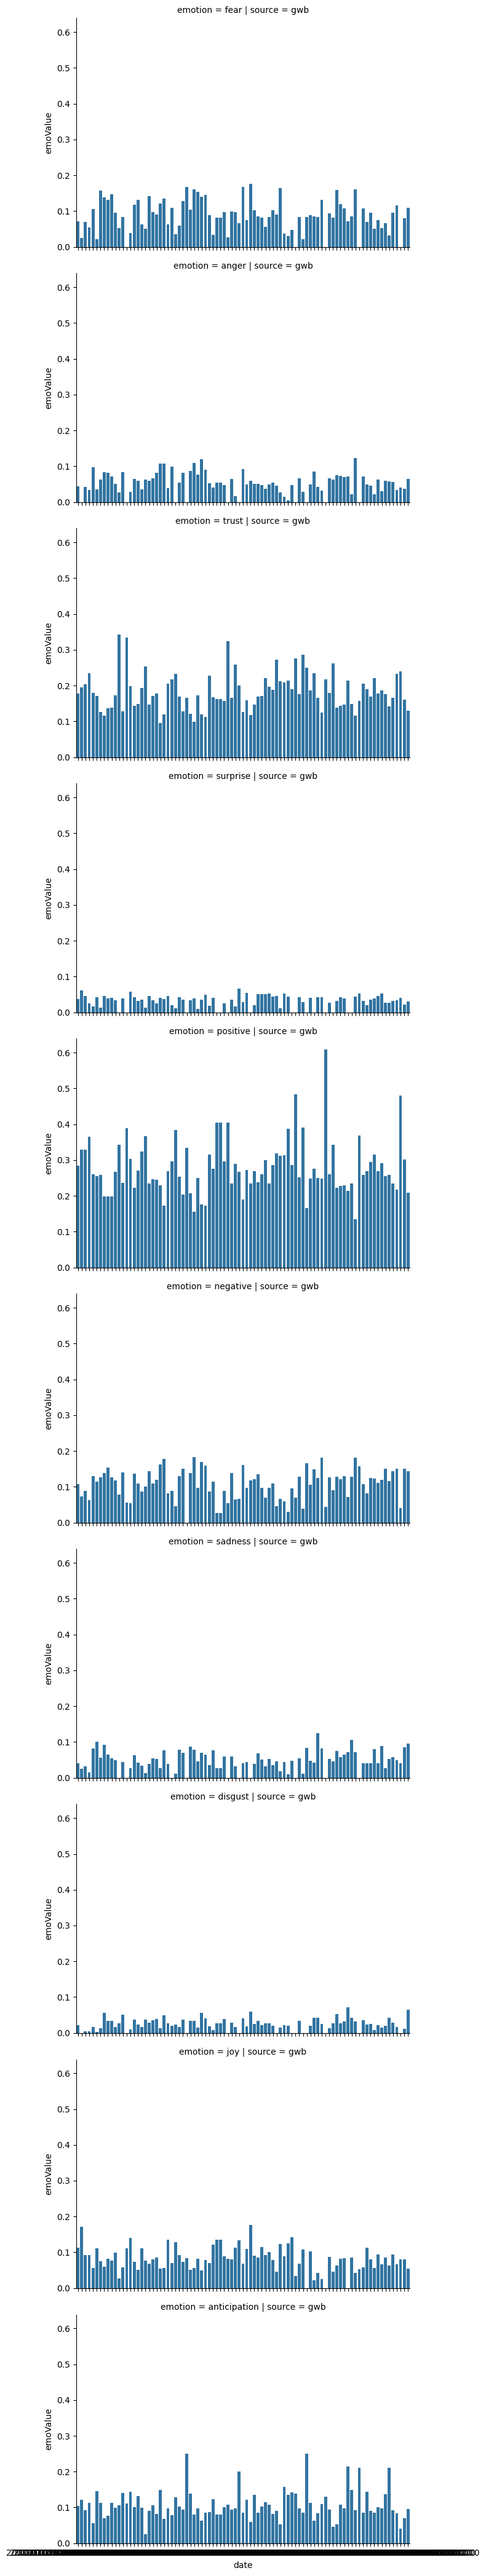

In [97]:
# Give it 15ish seconds or so
# <seaborn.axisgrid.FacetGrid at 0x7efac9f911b0> comes up after about 10 seconds, the plots will follow later
times = facetPlotData.date.unique()
g = sns.FacetGrid(facetPlotData, col="source", row="emotion", height=4.2, aspect=1.9)
g.map(sns.barplot, "date", "emoValue", errorbar=None, order=times)

In [59]:
# Lets look at some of those goofy values

def findmax(sourcefm, emofm, printyn):
    '''
    Function to print date of maximum value of subset of data
    # sourcefm - source name (oba, nyt, wsj)
    # emofm - emotion name (fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation)
    # printyn = 0 or 1 to print text
    '''
    find = facetPlotData[(facetPlotData['source'] == sourcefm) & (facetPlotData['emotion'] == emofm)]
    result = find.loc[find['emoValue'].idxmax()]
    date = result['date'].strftime('%Y-%m-%d')
    print(date, round(result['emoValue'], 4))
    if printyn == 1:
        text = 'text_' + sourcefm
        print(df2.query('date == @date')[text])

In [60]:
# Tells pandas to print all the text when printing an article or speech not just a 50 character preview
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

In [61]:
findmax('', 'anger', 1)

ValueError: attempt to get argmax of an empty sequence

2015-01-08 This is Obama's statement on the Charlie Hebdo terrorist act in Paris, it uses language like 'strongly condemn the horrific shooting' and 'outrageous attack'

In [35]:
findmax('nyt', 'positive', 1)

2011-02-19 0.5
29    The Intel Corporation announced plans on Friday to build a $5 billion microprocessor plant in Arizona and hire 4,000 employees in the United States this year. The workers will focus on product development, research and design, the chief executive, Paul S. Otellini, said. Mr. Otellini disclosed the plans for the plant during a visit by President Obama to an Intel plant near Portland, Ore. The new plant will be located at the company's existing site in Chandler, Ariz.
Name: text_nyt, dtype: object


2011-02-19 This is the NY Times brief article on Intel's announcement that they would be building a new fab in AZ

In [36]:
findmax('wsj', 'negative', 0)

2010-05-07 0.4211


2010-05-07 this Wall Street Journal article reports on a stock sell off using language like 'stock market plunged Thursday in a harrowing five-minute selloff'.  We could do a deeper study on what makes this more negative than other articles on average.

In [37]:
findmax('oba', 'positive', 0)

2014-03-07 0.4107


2014-03-07 Obama's statement on Russia and Ukraine, not sure what makes this more positive. He does mention the cooperation of allies and authorizing sanctions. Maybe do a histogram of this vs other speeches, or maybe Correspondence Analysis to see what words occur more in this than would be expected.

In [38]:
(facetPlotData.query('source == "oba" and emotion == "anger"')
              .sort_values('emoValue', ascending=False)
              .head()
)

date source emotion  emoValue
2281 2015-01-08    oba   anger  0.163636
211  2009-06-15    oba   anger  0.113475
1501 2013-01-16    oba   anger  0.111842
2581 2015-10-02    oba   anger  0.108696
1801 2013-09-11    oba   anger  0.105769

These plots are ripped off from<P>
<A HREF="https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0">8 Visualizations with Python to Handle Multiple Time-Series Data</A>

In [37]:
# One source at a time
data = facetPlotData.query('source == "wsj"') # oba, nyt, wsj

# extract color palette, the palette can be changed
# Same number of colors as number of Attributes
list_emo = list(set(Attributes))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_emo)).as_hex())

fig = go.Figure()
for d,p in zip(list_emo, pal):
    fig.add_trace(go.Scatter(x = data[data['emotion']==d]['date'],
                             y = data[data['emotion']==d]['emoValue'],
                             name = d,
                             line_color = p, 
                             fill=None)) 

fig.show()

In [38]:
# Could also do one emotion at a time and color by source

# emotion name (fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation)
emodata = facetPlotData.query('emotion == "joy"') # oba, nyt, wsj

# extract color palette, the palette can be changed
# Same number of colors as number of Attributes
list_source = list(set(facetPlotData['source']))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_source)).as_hex())

fig = go.Figure()
for d,p in zip(list_source, pal):
    fig.add_trace(go.Scatter(x = emodata[emodata['source']==d]['date'],
                             y = emodata[emodata['source']==d]['emoValue'],
                             name = d,
                             line_color = p, 
                             fill=None)) 

fig.show()

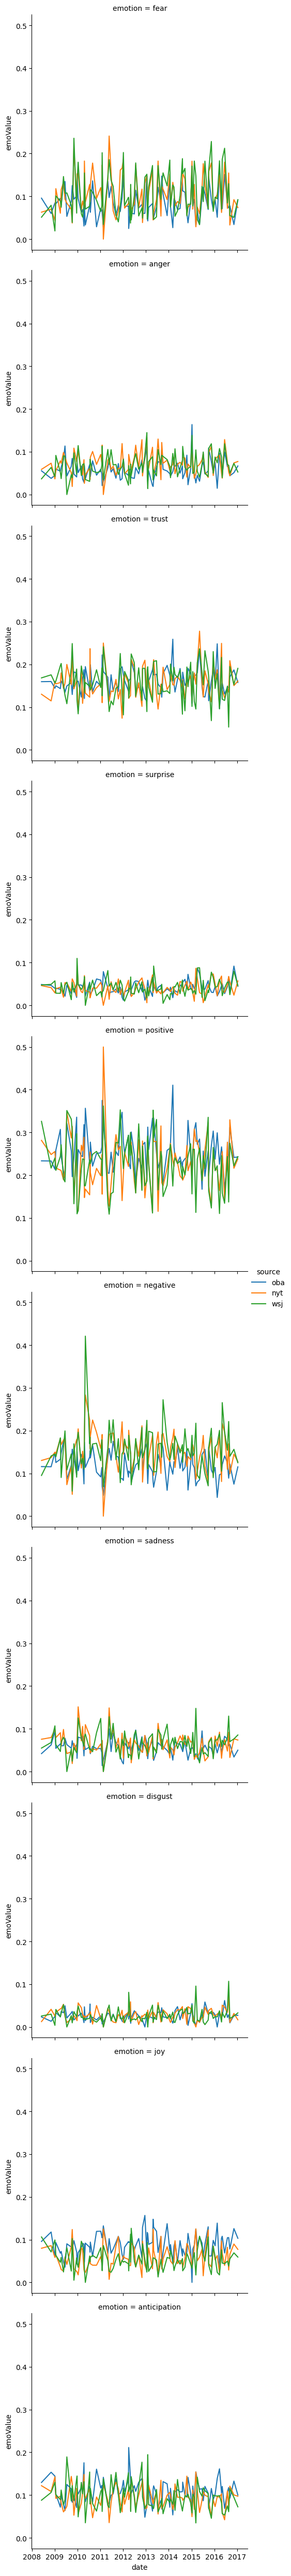

In [41]:
sns.relplot(data=facetPlotData, x="date", y="emoValue", hue="source", row="emotion", kind="line")

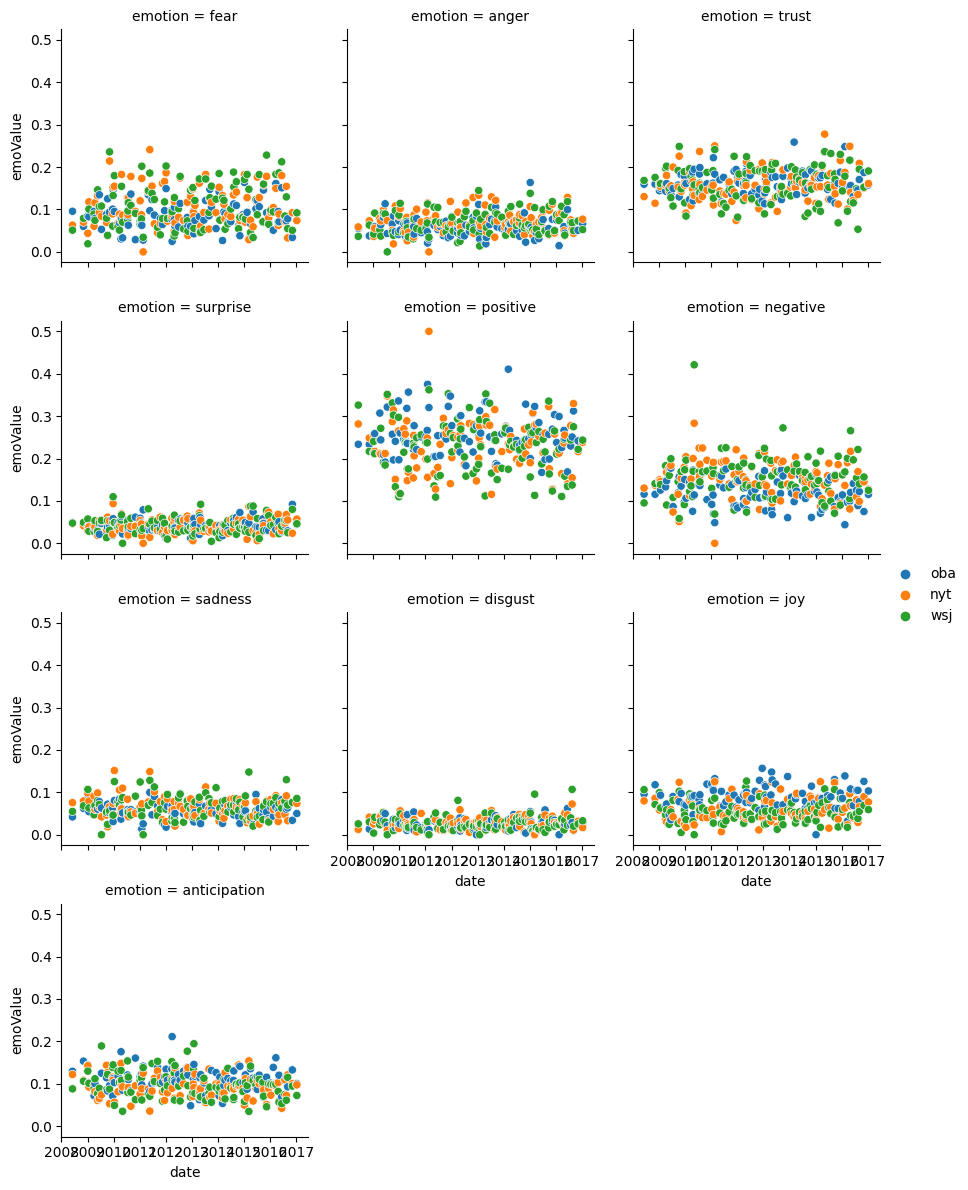

In [42]:
g = sns.FacetGrid(facetPlotData, col="emotion", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="date", y="emoValue", hue="source")
g.add_legend()

ConversionError: Failed to convert value(s) to axis units: ''

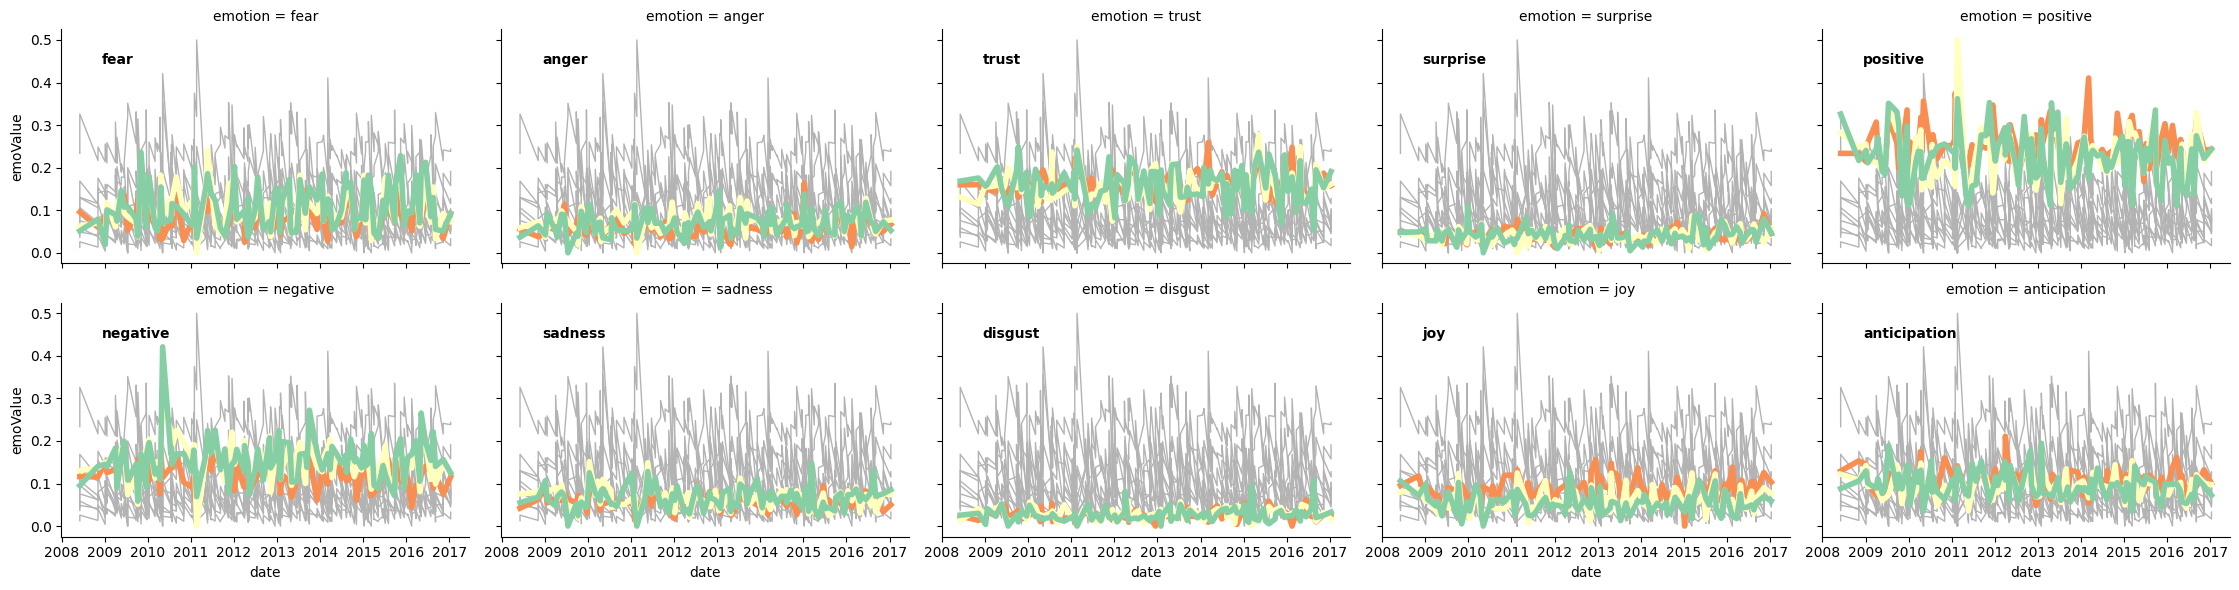

In [43]:
# This isn't working yet, maybe it doesn't matter
g = sns.relplot(data = facetPlotData, x = "date", y = "emoValue",
                col = "emotion", hue = "source",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = facetPlotData, x = "date", y = "emoValue", units="emotion",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("date", "emoValue")
g.tight_layout()

In [44]:
# Save to file so we don't have to start over every time
#facetPlotData.to_csv('facetPlotData.csv', index=False)
facetPlotData = pd.read_csv('facetPlotData.csv')

In [46]:
# Save the dataframe with texts and emotion values
# df2.to_csv('fullEmotionData.csv', index=False)

# Need to cast date string to datetime object
df2 = pd.read_csv('fullEmotionData.csv')
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

In [59]:
print('\t',sources[0],'\t',sources[1],'\t',sources[2])
for attr in Attributes:
    print(attr,'\t',
          round(np.mean(facetPlotData.query('source == "oba" & emotion == @attr')['emoValue']), 3),'\t',
          round(np.mean(facetPlotData.query('source == "nyt" & emotion == @attr')['emoValue']), 3),'\t',
          round(np.mean(facetPlotData.query('source == "wsj" & emotion == @attr')['emoValue']), 3))
    print('\n')
        

	 oba 	 nyt 	 wsj
fear 	 0.085 	 0.106 	 0.106


anger 	 0.058 	 0.072 	 0.068


trust 	 0.162 	 0.157 	 0.159


surprise 	 0.042 	 0.041 	 0.042


positive 	 0.256 	 0.227 	 0.227


negative 	 0.12 	 0.153 	 0.155


sadness 	 0.056 	 0.064 	 0.065


disgust 	 0.026 	 0.028 	 0.027


joy 	 0.087 	 0.058 	 0.054


anticipation 	 0.109 	 0.094 	 0.097


